Title: Performance Evaluation

Task 1: Regression Metrics<br>
Use metrics like RMSE and MAE for the House Prices dataset.

Task 1 - RMSE: 31402.72, MAE: 24820.14
Task 2 - Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1 Score: 0.98
Task 3 - AUC Score: 0.52


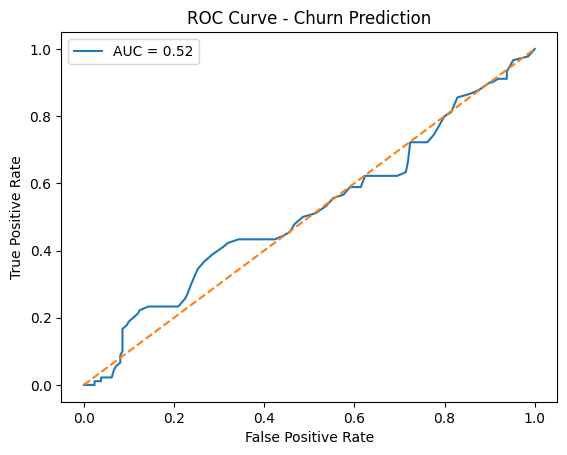

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Task 1: Regression Metrics - House Prices
np.random.seed(42)
size = 1000
sqft = np.random.randint(500, 4000, size=size)
beds = np.random.randint(1, 6, size=size)
price = sqft * 200 + beds * 10000 + np.random.normal(0, 30000, size=size)
df = pd.DataFrame({'Sqft': sqft, 'Beds': beds, 'Price': price})
X = df[['Sqft', 'Beds']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
print(f"Task 1 - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Task 2: Classification Metrics - Iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds, average='macro')
rec = recall_score(y_test, preds, average='macro')
f1 = f1_score(y_test, preds, average='macro')
print(f"Task 2 - Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f1:.2f}")

# Task 3: AUC-ROC Curve - Churn
size = 1000
tenure = np.random.randint(1, 72, size=size)
charges = np.random.uniform(20, 120, size=size)
total = tenure * charges + np.random.normal(0, 50, size=size)
churn = np.random.choice([0, 1], size=size, p=[0.7, 0.3])
df = pd.DataFrame({'Tenure': tenure, 'Charges': charges, 'Total': total, 'Churn': churn})
X = df[['Tenure', 'Charges', 'Total']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)
print(f"Task 3 - AUC Score: {auc_score:.2f}")
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Churn Prediction')
plt.legend()
plt.show()


Task 2: Classification Metrics<br>
Evaluate the Iris dataset using accuracy, precision, recall, and F1-score.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.93


Task 3: AUC-ROC Curve for Churn Model<br>
Generate an AUC-ROC curve to evaluate customer churn model performance.

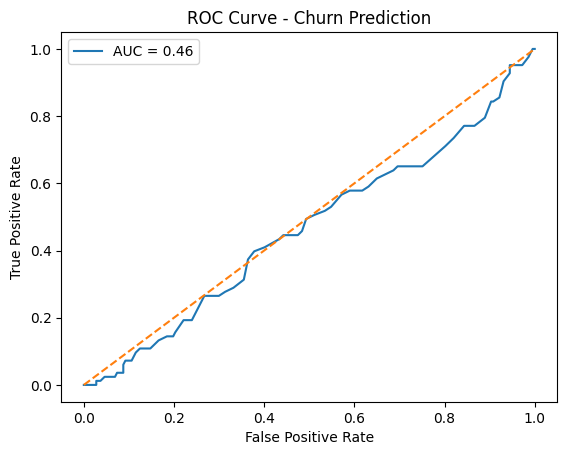

AUC Score: 0.46


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Sample data generation for customer churn prediction
np.random.seed(42)
size = 1000
tenure = np.random.randint(1, 72, size=size)
charges = np.random.uniform(20, 120, size=size)
total = tenure * charges + np.random.normal(0, 50, size=size)
churn = np.random.choice([0, 1], size=size, p=[0.7, 0.3])

df = pd.DataFrame({'Tenure': tenure, 'Charges': charges, 'Total': total, 'Churn': churn})

X = df[['Tenure', 'Charges', 'Total']]
y = df['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get predicted probabilities
probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Churn Prediction')
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.2f}")
